In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker
import os
import scipy
import pickle

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Fontconfig warning: ignoring UTF-8: not a valid region tag
/Users/egeerdogan/mambaforge/envs/mubind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


# SELEX (one dataset)

In [3]:
n_rounds = 1
data = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None)
data.columns = ['seq'] + [i for i in range(n_rounds+1)]
data.index = data['seq']
del data['seq']
data = data.sample(n=1000)
labels = list(data.columns[:n_rounds + 1])

In [4]:
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, labels=labels)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [5]:
model, best_loss = mb.tl.optimize_iterative(train, device, num_epochs=6, show_logo=False, 
                                         early_stopping=50, log_each=2)

next w 15 <class 'int'>
# rounds [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

IndexError: The shape of the mask [256, 1] at index 1 does not match the shape of the indexed tensor [256, 2] at index 1

In [6]:
r2 = mb.pl.R2_calculation(model, train)
print("R^2:", r2)

R^2: [0.00032254469330794677]


In [16]:
model = mb.models.Multibind(
    datatype="selex",
    kernels=[0, 1],
    n_rounds=n_rounds,
    init_random=True,
    n_batches=64,
    enr_series=False,
).to(device)

{'kernels': [0, 1], 'n_rounds': 1, 'init_random': True, 'n_batches': 64, 'enr_series': False, 'n_kernels': 2}
1


simple
here...  2


ValueError: Length mismatch: Expected axis has 16 elements, new values have 4 elements

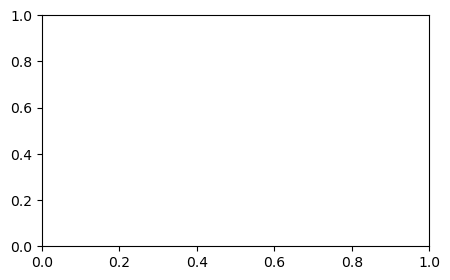

In [18]:
for mode in ['simple', 'complex', 'triangle']:
    print(mode)
    mb.pl.conv_di(model, mode=mode, figsize=(5, 3))

# PBM

In [7]:
matlab_path = os.path.join(bd.constants.ANNOTATIONS_DIRECTORY, 'pbm', 'affreg', 'PbmDataHom6_norm.mat')
mat = scipy.io.loadmat(matlab_path)
data = mat['PbmData'][0]
seqs_dna =  data[0][5]
seqs_dna = [s[0][0] for s in seqs_dna]
# load the MSA sequences, one hot encoded
df, signal = bd.datasets.PBM.pbm_homeo_affreg()
# x, y = pickle.load(open('../../data/example_homeo_PbmData.pkl', 'rb'))
# x, y = pickle.load(open('annotations/pbm/example_homeo_PbmData.pkl', 'rb'))

In [8]:
# build a small subsample
# x = x[1:6]
seqs_dna = seqs_dna[0:1000]
signal = signal[0:1, 0:1000]

# shift signal by adding a constant s.t. no negative values are included
signal -= np.min(signal)

# Set up the dataset
df = pd.DataFrame(signal.T)
df['seq'] = seqs_dna
df.index = df['seq']
del df['seq']

In [9]:
dataset = mb.datasets.PBMDataset(df)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [10]:
model, best_loss = mb.tl.train_iterative(train, device, num_epochs=500, show_logo=False,
                                         early_stopping=50, log_each=50)

next w 15 <class 'int'>
# proteins 1

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0


kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.MSELoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 175707.976562 , best epoch: 49 secs per epoch: 0.054 s
Epoch: 101, Loss: 175599.679688 , best epoch: 99 secs per epoch: 0.053 s
Epoch: 151, Loss: 175561.660156 , best epoch: 149 secs per epoch: 0.053 s
Epoch: 201, Loss: 175543.472656 , best epoch: 199 secs per epoch: 0.053 s
Epoch: 251, Loss: 175533.371094 , best epoch: 245 secs per epoch: 0.053 s
Epoch: 301, Loss: 175527.222656 , best epoch: 298 secs per epoch: 0.053 s
Epoch: 351, Loss: 175520.937500 , best epoch: 349 secs per epoch: 0.053 s
Epoch: 401, Loss: 175518.519531 , best epoch: 391 secs per epoc

In [7]:
r2 = mb.pl.R2_calculation(model, train)
print("R^2:", r2)

R^2: [0.0008757068052960282]


In [9]:
for mode in ['simple', 'complex', 'triangle']:
    mb.pl.conv_di(model, mode=mode, figsize=(10, 10))

AttributeError: 'Multibind' object has no attribute 'conv_mono'

# Selex (multiple datasets)

In [30]:
# Prerequisites for using multiple datasets:
# - Both datasets need to be about the same protein.
# - They need to contain the same number of rounds.
# - They need to have a column called "batch" indicating from which dataset each line comes from.
# - The parameter labels needs to be given to SelexDataset as well.

n_rounds = 1
data1 = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None)
data1.columns = ['seq'] + [i for i in range(n_rounds+1)]
data1.index = data1['seq']
del data1['seq']
data1 = data1.sample(n=1000)
data1["batch"] = 'A'

data2 = pd.read_csv('../data/countTable.0.CTCF_ESAJ_TAGCGA20NGCT.tsv.gz', sep='\t', header=None)
data2.columns = ['seq'] + [i for i in range(5)]
data2.index = data2['seq']
del data2['seq']
data2 = data2[[i for i in range(n_rounds+1)]]
data2 = data2[data2[0] + data2[1] > 0]
data2 = data2.sample(n=1000)
data2["batch"] = 'B'

data = pd.concat([data1, data2])
labels = list(data1.columns[:n_rounds + 1])

In [31]:
data[data[0] + data[1] > 0]

,0,1,batch
seq,,,
ACGCGGAATATTAAAGTGGAGGTGACGGCC,1,0,A
TTTAACTTGGGCTCAGATATGGCGTCTGGG,1,0,A
TTGTCTAGGTGAGGCACGGTCTAAGAGGCG,1,0,A
GGGTTGCAGGGGGTGGGTGGTGGGATGTTA,1,0,A
AAGGTGTGTGTCCTGATGGGGAATGCGTGG,1,0,A
...,...,...,...
CAGCTACAAACTACACATAG,0,1,B
GCAAGAATAGCCAAAAACGT,1,0,B
CTAACGGAAAATGGCGAAGG,0,1,B


In [32]:
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds, labels=labels)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [33]:
model, best_loss = mb.tl.train_iterative(train, device, num_epochs=500, show_logo=False, 
                                         early_stopping=50, log_each=50)

next w 15 <class 'int'>
# rounds 1
# batches 2
# enr_series True

Kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0


kernels mask None
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'> n_epochs 500 early_stopping 50
lr= 0.01, weight_decay= 0.001, dir weight= 0
Epoch: 51, Loss: 0.846386 , best epoch: 49 secs per epoch: 0.100 s
Epoch: 101, Loss: 0.844431 , best epoch: 83 secs per epoch: 0.100 s
Epoch: 151, Loss: 0.844400 , best epoch: 126 secs per epoch: 0.099 s
Epoch: 177, Loss: 0.8445 , best epoch: 126 secs per epoch: 0.099 s
early stop!
total time: 17.466 s
secs per epoch: 0.099 s

Kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
setting grad status of kernel at 2 to 0
setting grad status of kernel at 3 to 0


kernels mask Non

In [34]:
r2 = mb.pl.R2_calculation(model, train)
print("R^2:", r2)

R^2: [0.010105660487551682]


In [35]:
model

Multibind(
  (padding): ConstantPad2d(padding=(14, 14, 0, 0), value=0.25)
  (binding_modes): BindingModesSimple(
    (conv_mono): ModuleList(
      (0): None
      (1): Conv2d(1, 1, kernel_size=(4, 15), stride=(1, 1), bias=False)
      (2): Conv2d(1, 1, kernel_size=(4, 15), stride=(1, 1), bias=False)
      (3): Conv2d(1, 1, kernel_size=(4, 15), stride=(1, 1), bias=False)
    )
    (conv_di): ModuleList(
      (0): None
      (1): Conv2d(1, 1, kernel_size=(16, 15), stride=(1, 1), bias=False)
      (2): Conv2d(1, 1, kernel_size=(16, 15), stride=(1, 1), bias=False)
      (3): Conv2d(1, 1, kernel_size=(16, 15), stride=(1, 1), bias=False)
    )
  )
  (activities): ActivitiesSimple(
    (log_activities): ParameterList(
        (0): Parameter containing: [torch.FloatTensor of size 2x2]
        (1): Parameter containing: [torch.FloatTensor of size 2x2]
        (2): Parameter containing: [torch.FloatTensor of size 2x2]
        (3): Parameter containing: [torch.FloatTensor of size 2x2]
    )
  )